In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
! wget https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja -O data

In [ ]:
!unzip data -d "images/" #unzipping the zipped dataset we brought.

In [ ]:
pip install keras_preprocessing

In [6]:
classes = os.listdir("images/Train")

In [7]:
classes

['Charmander', 'Pikachu', 'Bulbasaur']

In [9]:
for pokemon_type in classes:
  path = "images/Train/" + pokemon_type   #
  print(f"{pokemon_type} - {len(os.listdir(path))}")

Charmander - 102
Pikachu - 101
Bulbasaur - 101


In [11]:
for pokemon_type in classes:
  path = "images/Test/" + pokemon_type   #
  print(f"{pokemon_type} - {len(os.listdir(path))}")

Charmander - 42
Pikachu - 40
Bulbasaur - 41


In [12]:
from keras_preprocessing import image

In [13]:
train_data = []
train_labels = []

In [15]:
for category in classes:
  folder = f"images/Train/{category}"   #path to our image
  for image_name in os.listdir(folder):
    img_path = os.path.join(folder,image_name)  #path to image name like pikachu image 226.

    img = image.load_img(img_path, target_size=(100,100))#to read image and  have common regular size. the image coverted to 100,100 image size
    img_array = image.img_to_array(img)
    train_data.append(img_array)
    train_labels.append(category)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
len(train_data)

304

In [17]:
train_data = np.array(train_data) #converting data array into cpp data array
train_labels = np.array(train_labels)

In [18]:
train_data = train_data.reshape(len(train_data), 30000) #reshaping the data

In [21]:
train_data.shape

(304, 30000)

In [29]:
category2label = {"Pikachu":0, "Charmander":1, "Bulbasaur":2}
label2category = {0:"Pikachu", 1:"Charmander", 2:"Bulbasaur"}

In [30]:
train_labels = np.array([category2label[label] for label in train_labels])

In [31]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)

In [ ]:
train_labels

In [33]:
from keras.layers import Dense #Represents each of the layers
from keras import Sequential #it will hold all these dense layers and makeup the squence


In [34]:
features = train_data.shape[1]

In [35]:
model = Sequential()#intialised an empty model


In [40]:
model.add( Dense(units=512,activation= 'relu', input_shape=(features,)))

In [41]:
model.add( Dense(units=256,activation= 'relu'))

In [42]:
model.add( Dense(units=128,activation= 'relu'))

In [43]:
model.add( Dense(units=64,activation= 'relu'))

In [45]:
model.add( Dense(units=3, activation = "softmax")) #shows output in 0s and 1s only

In [49]:
model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=['accuracy'] )

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               15360512  
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 15,533,187
Trainable params: 15,533,187
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_data, train_labels, batch_size = 32, epochs = 50) #after every itiration, model

In [53]:
test_image = "/content/my pikachu.png"
img = image.load_img(test_image, target_size = (100,100))
img = image.img_to_array(img)
img.shape

(100, 100, 3)

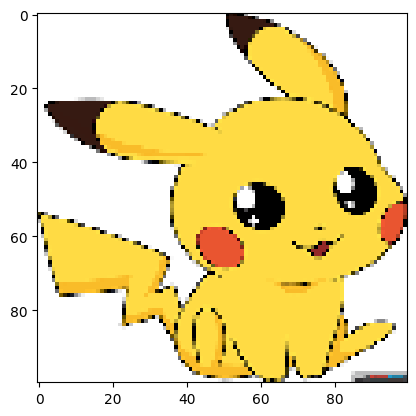

In [54]:
plt.imshow(img.astype('int'));

In [55]:
img = img.reshape(1,30000)

In [57]:
model.predict(img).argmax()

1/1 [==============================] - 0s 69ms/step


0

In [58]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 [==============================] - 0s 34ms/step


'Pikachu'